## Convert the genes of interest into csv with first column the gene name (human symbol, but should not matter too much

In [10]:
## Parameters specific to where your folders are and your data
parameter_file = 'params/params.yaml'
import yaml
import sys

with open(parameter_file,'r') as f:
    doc = yaml.load(f)

#p = dic2obj(**doc)

data_folder = doc['data_folder']
tissues = doc['tissues'].split(',')
sys.path.append(doc['pipeline_path'])
ref_fa = doc['ref_fa']
anno_gff=doc['annotation']
mRNA_peak_file = doc["mRNA_peak_file"]
supplemental = doc["supplemental"]
tss_annotation = doc['tss_annotation']


import os

import sys
import pandas as pd
import matplotlib
import seaborn as sns
import pickle
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from itertools import product
import glob
import re
from matplotlib_venn import venn2
from matplotlib import rcParams
import inspect
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sys.setrecursionlimit(3000)
%load_ext autoreload
%autoreload 2
rcParams['figure.figsize'] = 8, 6
import tqdm

from os.path import basename
print('Number of tissues: ',len(tissues))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
('Number of tissues: ', 13)


In [2]:
from Homer import *
from create_output import *
import annotation

In [3]:
outdir = os.path.join(supplemental,"silenced_genes_CHO/preprocessed")
if not os.path.exists(outdir):
    print(outdir)
    os.mkdir(outdir)

In [4]:
amir_gtex = pd.read_csv('/data/isshamie/TSS/Analysis/supplemental/silenced_genes_CHO/amir.low.exp.csv')
amir_gtex = amir_gtex.drop_duplicates(subset=["humanSymbol"])
amir_gtex

,humanSymbol,humanID,choID,mean.read.count,is.secM.Amir
0,A3GALT2,127550,100774283,0.114583,True
1,ABO,28,100772592,0.437500,True
4,AGAP2,116986,100764978,0.875000,True
5,AGR2,10551,100769015,0.000000,True
6,AGR3,155465,100768729,0.541667,True
7,AP3B2,8120,100759367,0.229167,True
8,AP3M2,10947,100751069,0.114583,True
9,ARAP2,116984,100751597,0.166667,True
10,B4GALNT1,2583,100764682,0.072917,True
11,B4GALNT2,124872,100760696,0.531250,True


In [5]:
amir_gtex[["humanSymbol"]].to_csv(os.path.join(outdir,"secm_amir_gtex.csv"),header=None,
                                index=None)

In [6]:
amir_hek = pd.read_csv('/data/isshamie/TSS/Analysis/supplemental/silenced_genes_CHO/DEseq2_HEK_vs_CHO_SecM.tsv',sep="\t")
amir_hek = amir_hek.drop_duplicates(subset=["Gene"])
amir_hek

,Gene,Functional Group,transformed count: CHO,transformed count: HEK,Base mean,log2Fold Change,pvalue,padj
0,EIF2AK2,UPR,7.515612,11.730769,2060.670200,12.866868,1.630000e-257,9.400000e-257
1,HSPA1B,ERAD,7.851698,16.616026,69420.998100,12.686221,0.000000e+00,0.000000e+00
2,TBC1D9,trafficking,7.525395,10.691676,876.366981,12.038056,2.830000e-229,1.450000e-228
3,HSPA4L,ERAD,7.585788,12.073679,2644.552120,11.779352,0.000000e+00,0.000000e+00
4,RAB11FIP1,trafficking,7.514553,10.356501,649.111685,11.467302,9.920000e-209,4.670000e-208
5,GALNT3,Golgi glycosylation,7.510475,9.722050,352.133804,11.418969,4.090000e-201,1.850000e-200
6,AP3M2,trafficking,7.554517,10.600439,820.636271,11.300344,1.350000e-221,6.710000e-221
7,GALNT12,Golgi glycosylation,7.510475,9.653621,324.205825,10.673245,2.500000e-178,9.900000e-178
8,RAB36,trafficking,7.513849,9.299300,219.872309,10.535432,1.700000e-162,6.230000e-162
9,TBC1D30,trafficking,7.534184,9.473226,263.576426,10.349137,9.590000e-169,3.640000e-168


In [7]:
amir_hek[["Gene"]].to_csv(os.path.join(outdir,"secm_amir_hek.csv"),header=None,
                                index=None)

In [8]:
#Load and save to write format
anne_hek = pd.read_csv("/data/isshamie/TSS/Analysis/supplemental/silenced_genes_CHO/anne.low.exp.csv")
anne_hek = anne_hek.drop_duplicates(subset=["humanSymbol"])
anne_hek = anne_hek[["humanSymbol"]].to_csv(os.path.join(outdir, "secm_anne_gtex.csv"),header=None,index=None)

In [9]:
pd.read_csv(
    "/data/isshamie/genome/ncbi_anno_103/all_genes.tsv",
    header=None).applymap(lambda x: x.upper()).to_csv(
        os.path.join(outdir, "all_genes.tsv"), header=None, index=None)

## Plot overlap

In [20]:
from matplotlib_venn import venn2
from matplotlib_venn import venn3

In [17]:
gene_lists = []
for i in glob.glob(os.path.join(outdir,"secm*")):
    gene_lists.append(set(pd.read_csv(i,header=None)[0].values))

gene_lists

[{'AGAP2',
  'AP3B2',
  'AP3M2',
  'ARAP2',
  'B4GALNT1',
  'DERL3',
  'EIF2AK2',
  'FBXO2',
  'GALNT12',
  'GALNT14',
  'GALNT15',
  'GALNT16',
  'GALNT18',
  'GALNT3',
  'GALNT5',
  'GALNT6',
  'GALNT8',
  'GALNTL5',
  'GALNTL6',
  'GXYLT2',
  'HSPA1B',
  'HSPA1L',
  'HSPA4L',
  'IQSEC3',
  'MGAT3',
  'MGAT4C',
  'MYO5B',
  'PDIA2',
  'PIGZ',
  'PSD4',
  'RAB11FIP1',
  'RAB11FIP4',
  'RAB15',
  'RAB19',
  'RAB26',
  'RAB27A',
  'RAB36',
  'RAB38',
  'RAB39A',
  'RAB3B',
  'RAB3C',
  'RAB6B',
  'RAB9B',
  'RASEF',
  'SGSM1',
  'SNAP25',
  'STX1B',
  'SVIP',
  'TBC1D30',
  'TBC1D9'},
 {'A3GALT2',
  'ABO',
  'AGAP2',
  'AGR2',
  'AGR3',
  'AP3B2',
  'AP3M2',
  'ARAP2',
  'B4GALNT1',
  'B4GALNT2',
  'CRYAA',
  'CYTH4',
  'DPP6',
  'EIF2AK2',
  'ERP27',
  'FBXO2',
  'GALNT12',
  'GALNT14',
  'GALNT15',
  'GALNT3',
  'GALNT5',
  'GALNT6',
  'GALNT8',
  'GALNT9',
  'GALNTL5',
  'GLT1D1',
  'GLT6D1',
  'HAS2',
  'IQSEC3',
  'LMAN1L',
  'MGAT3',
  'PDIA2',
  'PDILT',
  'PSD4',
  'RAB11FIP1',


<matplotlib_venn._common.VennDiagram instance at 0x7f3fea8c48c0>

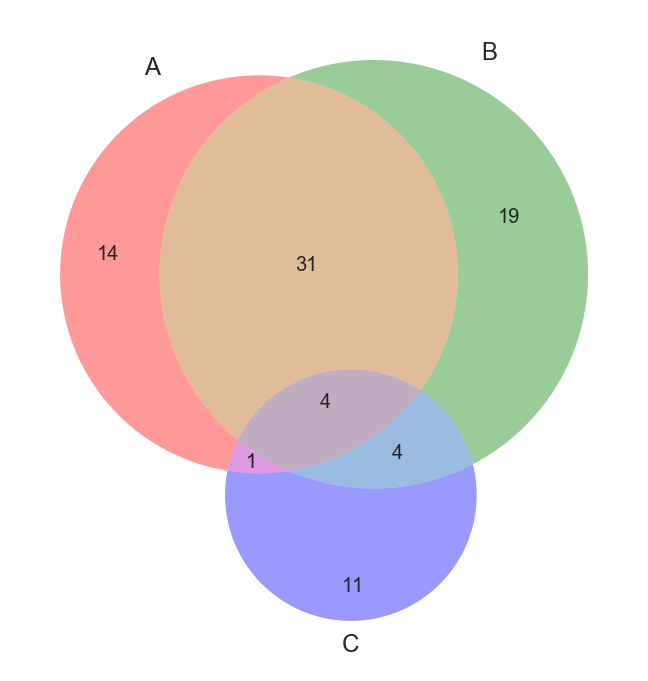

In [21]:
venn3(gene_lists)

In [32]:
print(len(gene_lists[0].union(gene_lists[1]).union(gene_lists[2])))
(gene_lists[0].union(gene_lists[1]).union(gene_lists[2]))

84


{'A3GALT2',
 'ABO',
 'AGAP2',
 'AGR2',
 'AGR3',
 'AP3B2',
 'AP3M2',
 'ARAP2',
 'B4GALNT1',
 'B4GALNT2',
 'CLGN',
 'CRYAA',
 'CYTH4',
 'DERL3',
 'DPP6',
 'EIF2AK2',
 'ERP27',
 'EXOC3L1',
 'FBXO2',
 'FKBP6',
 'FMO1',
 'GALNT12',
 'GALNT14',
 'GALNT15',
 'GALNT16',
 'GALNT18',
 'GALNT3',
 'GALNT5',
 'GALNT6',
 'GALNT8',
 'GALNT9',
 'GALNTL5',
 'GALNTL6',
 'GLT1D1',
 'GLT6D1',
 'GXYLT2',
 'HAS2',
 'HSPA1B',
 'HSPA1L',
 'HSPA4L',
 'IQSEC3',
 'LMAN1L',
 'MGAT3',
 'MGAT4C',
 'MYO5B',
 'PAPSS2',
 'PDIA2',
 'PDILT',
 'PIGZ',
 'PSD4',
 'RAB11FIP1',
 'RAB11FIP4',
 'RAB15',
 'RAB17',
 'RAB19',
 'RAB25',
 'RAB26',
 'RAB27A',
 'RAB33A',
 'RAB36',
 'RAB38',
 'RAB39A',
 'RAB3B',
 'RAB3C',
 'RAB6B',
 'RAB9B',
 'RASEF',
 'SGSM1',
 'SNAP25',
 'SORCS1',
 'SORCS2',
 'SORCS3',
 'SPCS3',
 'STX19',
 'STX1B',
 'SVIP',
 'TBC1D21',
 'TBC1D30',
 'TBC1D9',
 'TRAM1L1',
 'TRAPPC3L',
 'UBQLN3',
 'UBQLNL',
 'WDR38'}

In [33]:
s = {'A3GALT2',
 'ABO',
 'AGAP2',
 'AGR2',
 'AGR3',
 'AP3B2',
 'AP3M2',
 'ARAP2',
 'B4GALNT1',
 'B4GALNT2',
 'CLGN',
 'CRYAA',
 'CYTH4',
 'DERL3',
 'DPP6',
 'EIF2AK2',
 'ERP27',
 'FBXO2',
 'FKBP6',
 'FMO1',
 'GALNT12',
 'GALNT14',
 'GALNT15',
 'GALNT16',
 'GALNT18',
 'GALNT3',
 'GALNT5',
 'GALNT6',
 'GALNT8',
 'GALNT9',
 'GALNTL5',
 'GALNTL6',
 'GLT1D1',
 'GXYLT2',
 'HAS2',
 'HSPA4L',
 'IQSEC3',
 'LMAN1L',
 'MGAT3',
 'MGAT4C',
 'MYO5B',
 'PAPSS2',
 'PDIA2',
 'PDILT',
 'PIGZ',
 'PSD4',
 'RAB11FIP1',
 'RAB11FIP4',
 'RAB15',
 'RAB19',
 'RAB25',
 'RAB26',
 'RAB27A',
 'RAB33A',
 'RAB36',
 'RAB38',
 'RAB39A',
 'RAB3B',
 'RAB3C',
 'RAB6B',
 'RAB9B',
 'RASEF',
 'SGSM1',
 'SNAP25',
 'SORCS1',
 'SORCS2',
 'SORCS3',
 'SPCS3',
 'STX19',
 'STX1B',
 'SVIP',
 'TBC1D21',
 'TBC1D30',
 'TBC1D9',
 'TRAM1L1',
 'UBQLN3',
 'UBQLNL',
 'WDR38'}

In [35]:
(gene_lists[0].union(gene_lists[1]).union(gene_lists[2])).difference(s)

{'EXOC3L1', 'GLT6D1', 'HSPA1B', 'HSPA1L', 'RAB17', 'TRAPPC3L'}